# Default Behavior (Julia Function)

Here we setup, run and plot a two-dimensional random walker path.

In [1]:
using ClimateModels, Pkg, Plots, CSV, DataFrames

## Formulate Model

This simple model steps randomly, `N` times, on a `x,y` plane starting from `0,0`.

In [2]:
function RandomWalker(x)
    #model run
    nSteps=x.inputs["nSteps"]
    m=zeros(nSteps,2)
    [m[i,j]=m[i-1,j]+rand((-1,1)) for j in 1:2, i in 2:nSteps]

    #output to file
    df = DataFrame(x = m[:,1], y = m[:,2])
    fil=joinpath(x.folder,string(x.ID),"RandomWalker.csv")
    CSV.write(fil, df)

    return m
end

RandomWalker (generic function with 1 method)

## Setup And Run Model

- `ModelConfig` defines the model into data structure `m`
- `setup` prepares the model to run in a temporary folder
- `launch` runs the `RandomWalker` model which writes results to file

_Note: `RandomWalker` returns results also directly as an Array, but this is generally not an option for most, larger, models_

In [3]:
MC=ModelConfig(model=RandomWalker,inputs=Dict("nSteps" => 1000))
setup(MC)
build(MC)
launch(MC)

## Exercise

Change the duration parameter (nSteps) and update the following cells?

In [4]:
MC.inputs["nSteps"]=10000
setup(MC)
launch(MC)

## Plot Results

Afterwards, one often uses model output for further analysis. Here we plot the random walker path from the `csv` output file.

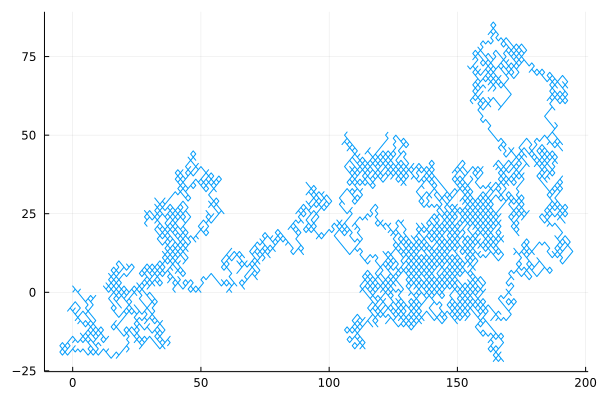

In [5]:
fil=joinpath(MC.folder,string(MC.ID),"RandomWalker.csv")
output = CSV.File(fil) |> DataFrame
img=plot(output.x,output.y,frmt=:png,leg=:none)

## Workflow Outline

Workflow steps are documented using `git`.
Here we show the git record for this workflow (in timeline order).

In [6]:
git_log_show(MC)

7-element Vector{String}:
 "e88b1bd initial setup"
 "f89e7fb initial tracked_parameters.toml"
 "bae6aaf task started [961c672f-8c0c-49be-bc10-56f31ae1b9ef]"
 "e9a7a73 task ended   [961c672f-8c0c-49be-bc10-56f31ae1b9ef]"
 "d853baf modify tracked_parameters.toml"
 "d09b55b task started [b9985b8c-aac4-4094-ac8d-03ea4ecb19cf]"
 "f4d7d3e (HEAD -> main) task ended   [b9985b8c-aac4-4094-ac8d-03ea4ecb19cf]"

_See run folder for workflow output:_

In [7]:
show(MC)

  ID            = 111dc42b-b1cb-4a3f-8073-51282eb46726
  model         = RandomWalker
  configuration = anonymous
  run folder    = /tmp/111dc42b-b1cb-4a3f-8073-51282eb46726
  log subfolder = /tmp/111dc42b-b1cb-4a3f-8073-51282eb46726/log


---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*